# **Data Science on President Heights**

> This project come from:  
> [https://amanxai.com/2020/05/09/data-science-project-on-area-and-population/](https://amanxai.com/2020/05/08/data-science-project-on-president-heights/)

## Let's initialise everything and load the data.

In [64]:
# Initialisation
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [65]:
# Loading the data
president_heights = pd.read_csv("data/president_heights.csv")
president_heights.head()

,order,name,height(cm)
0,1,George Washington,189
1,2,John Adams,170
2,3,Thomas Jefferson,189
3,4,James Madison,163
4,5,James Monroe,183


### Let's do some EDA.

In [66]:
president_heights.info()

<class 'pandas.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   order       42 non-null     int64
 1   name        42 non-null     str  
 2   height(cm)  42 non-null     int64
dtypes: int64(2), str(1)
memory usage: 1.1 KB


In [67]:
president_heights.describe()

,order,height(cm)
count,42.000000,42.000000
mean,22.476190,179.738095
std,13.152461,7.015869
min,1.000000,163.000000
25%,11.250000,174.250000
50%,22.000000,182.000000
75%,33.750000,183.000000
max,44.000000,193.000000


## Now it's time to work on it.

In [68]:
# Let's convert our 'heights' column into an array
heights = president_heights['height(cm)'].to_numpy()
print(heights)

[189 170 189 163 183 171 185 168 173 183 173 173 175 178 183 193 178 173
 174 183 183 168 170 178 182 180 183 178 182 188 175 179 183 193 182 183
 177 185 188 188 182 185]


In [69]:
# Now, let's look some stats (mean, min/max, standard deviation)
average_heights = np.mean(heights)
std_heights = np.std(heights)
min_heights, max_heights = np.min(heights), np.max(heights)

print(f"Mean: {average_heights:.3f} cm")
print(f"Min/max heights: {min_heights} - {max_heights} cm")
print(f"Standard deviation: {std_heights:.3f}")

Mean: 179.738 cm
Min/max heights: 163 - 193 cm
Standard deviation: 6.932


In [70]:
# Other stats (percentiles)
p_25 = np.percentile(heights, 25)
p_50 = np.percentile(heights, 50)
p_75 = np.percentile(heights, 75)

print(f"25th percentile: {p_25:.1f} cm")
print(f"50th percentile: {p_50:.1f} cm")
print(f"75th percentile: {p_75:.1f} cm")

25th percentile: 174.2 cm
50th percentile: 182.0 cm
75th percentile: 183.0 cm


## Let's visualize this data

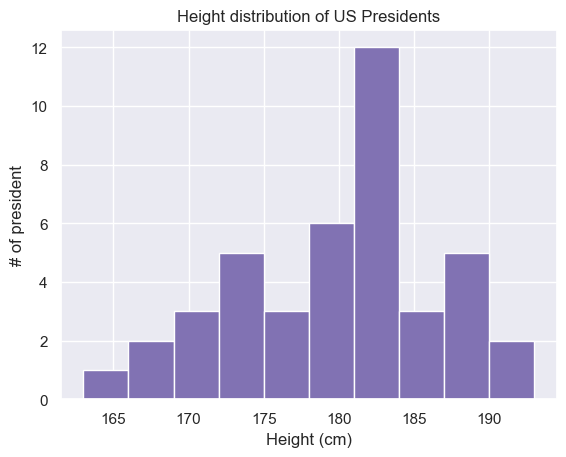

In [71]:
plt.hist(heights, color='m')
plt.title("Height distribution of US Presidents")
plt.xlabel("Height (cm)")
plt.ylabel("# of president")
plt.show()

## Let's look the evolution of height during the year

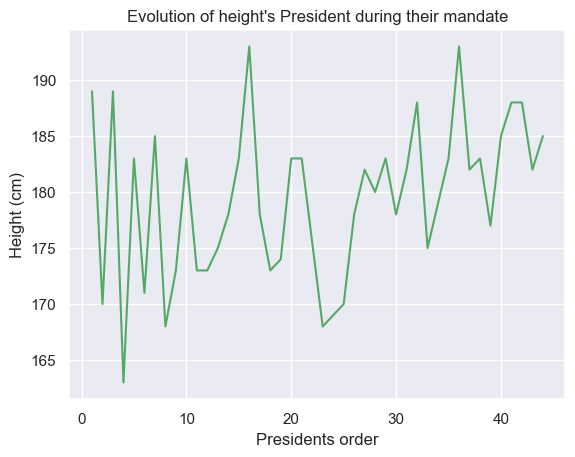

In [72]:
plt.plot(president_heights['order'], president_heights['height(cm)'], 'g')
plt.title("Evolution of height's President during their mandate")
plt.xlabel("Presidents order")
plt.ylabel("Height (cm)")
plt.show()

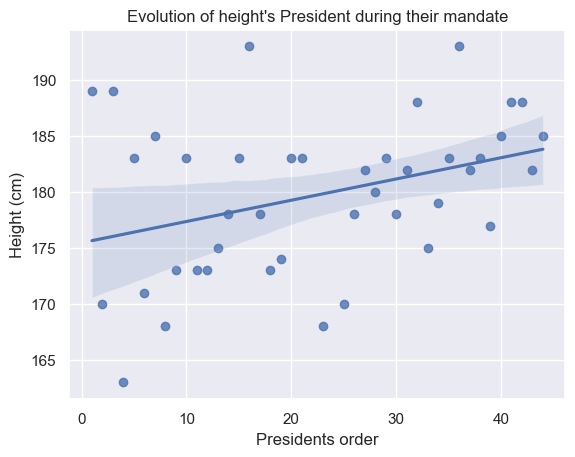

In [73]:
# Plotting the regression
sns.regplot(x=president_heights['order'], y=president_heights['height(cm)'])
plt.title("Evolution of height's President during their mandate")
plt.xlabel("Presidents order")
plt.ylabel("Height (cm)")
plt.show()

In [74]:
# Let's calculate our regression
reg = np.polyfit(president_heights['order'], president_heights['height(cm)'], 1)

print(f"Our regression's parameters are: {reg}")
print(f"So we have an increase of {reg[0]:.2f} cm for each president.")

Our regression's parameters are: [  0.18981214 175.47184139]
So we have an increase of 0.19 cm for each president.


In [75]:
# We can estimate the 47th president's height...
pres_num = 47
est_height = reg[0]*pres_num + reg[1]

print(f"The estimated height of the {pres_num}th President is {est_height:.2f} cm !")

The estimated height of the 47th President is 184.39 cm !


## Saving our final output

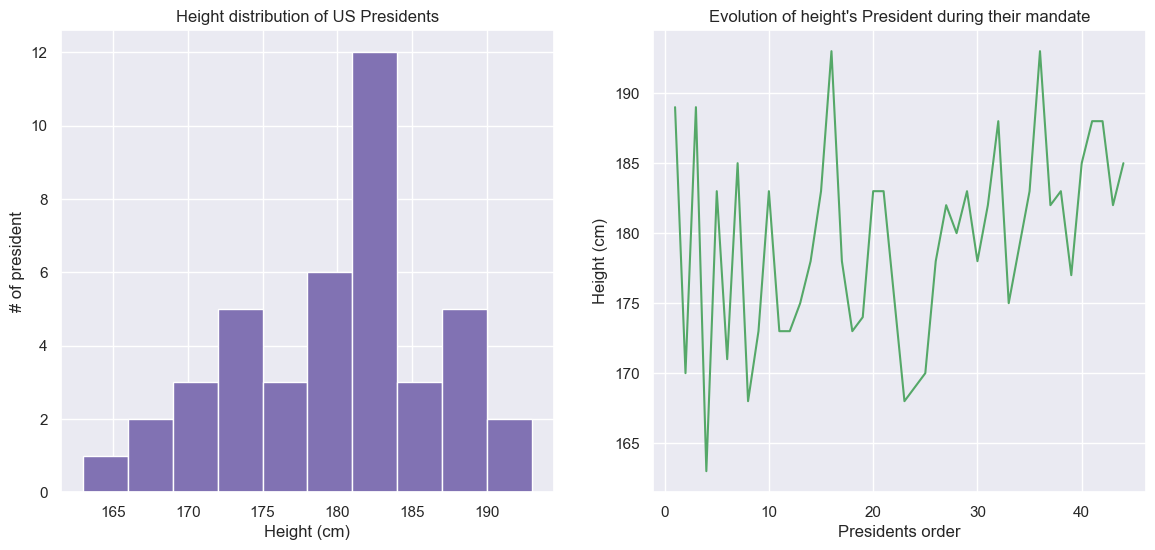

In [76]:
# Merge the 2 graphs and save them
plt.figure(figsize=(14, 6))
plt.subplot(1,2,1)
plt.hist(heights, color='m')
plt.title("Height distribution of US Presidents")
plt.xlabel("Height (cm)")
plt.ylabel("# of president")

plt.subplot(1,2,2)
plt.plot(president_heights['order'], president_heights['height(cm)'], 'g')
plt.title("Evolution of height's President during their mandate")
plt.xlabel("Presidents order")
plt.ylabel("Height (cm)")
plt.savefig("Output.png", dpi=300, bbox_inches='tight')
plt.show()